# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

### Use chicago as an example to see data structure

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

chicago_url = url + "&q=" + "chicago"

chicago_weather = requests.get(chicago_url).json()
chicago_weather

{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 47.3,
  'feels_like': 42.98,
  'temp_min': 43.32,
  'temp_max': 54.19,
  'pressure': 1024,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 80},
 'clouds': {'all': 20},
 'dt': 1682548309,
 'sys': {'type': 2,
  'id': 2005153,
  'country': 'US',
  'sunrise': 1682506435,
  'sunset': 1682556157},
 'timezone': -18000,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | makakilo city
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | marapanim
Processing Record 7 of Set 1 | taganak
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ossora
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | san bartolome de tirajana
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | srikakulam
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | bathsheba
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,makakilo city,21.3469,-158.0858,82.72,64,20,13.80,US,1682548518
1,fortuna,40.5982,-124.1573,67.93,69,45,3.00,US,1682548519
2,port lincoln,-34.7333,135.8667,62.78,81,3,19.42,AU,1682548519
3,katsuura,35.1333,140.3000,60.85,48,23,15.99,JP,1682548519
4,jamestown,42.0970,-79.2353,50.52,45,0,10.36,US,1682547998


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makakilo city,21.3469,-158.0858,82.72,64,20,13.80,US,1682548518
1,fortuna,40.5982,-124.1573,67.93,69,45,3.00,US,1682548519
2,port lincoln,-34.7333,135.8667,62.78,81,3,19.42,AU,1682548519
3,katsuura,35.1333,140.3000,60.85,48,23,15.99,JP,1682548519
4,jamestown,42.0970,-79.2353,50.52,45,0,10.36,US,1682547998


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

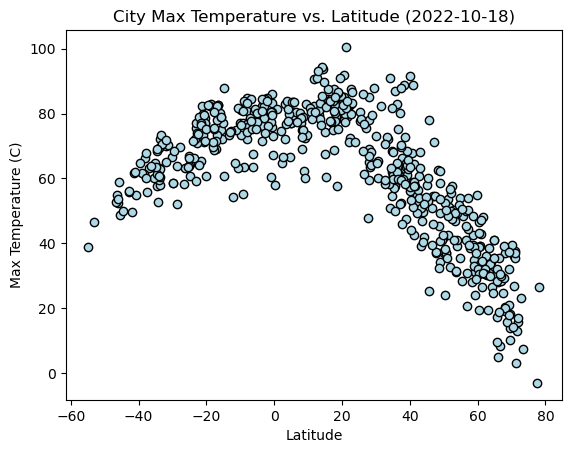

In [11]:
# Build scatter plot for latitude vs. temperature

latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

plt.scatter(x=latitude, y=max_temp, color = 'lightblue', edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

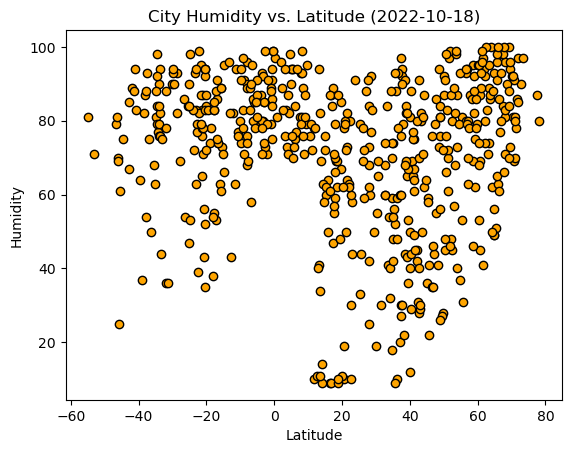

In [12]:
# Build the scatter plots for latitude vs. humidity

latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

plt.scatter(x=latitude, y=humidity, color = 'orange', edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

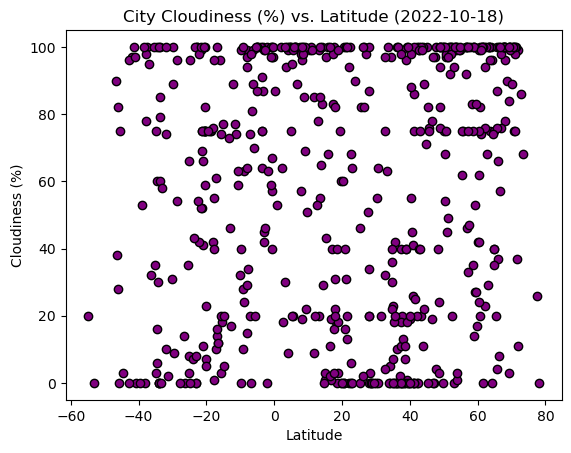

In [13]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

plt.scatter(x=latitude, y=cloudiness, color = 'purple', edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Cloudiness (%) vs. Latitude (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

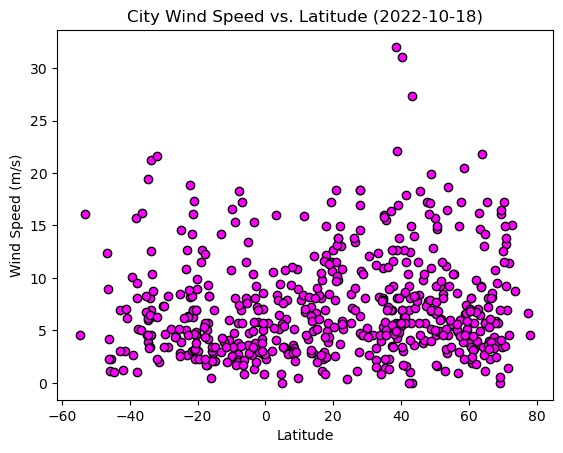

In [14]:
# Build the scatter plots for latitude vs. wind speed

latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

plt.scatter(x=latitude, y=wind_speed, color = 'magenta', edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


### The arguments of the linear regression plot functions are: x (independent variable), y (dependent variable), annotate_x (x coordinate of annotation), annotate_y (y coordinate of annotation), title, xlabel, & ylabel -- which are self-explanatory

In [43]:
# Define a function to create Linear Regression plots

def lin_reg_plot(x,y,annotate_x,annotate_y,title,xlabel,ylabel):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(annotate_x,annotate_y),fontsize=15,color="red")
    plt.title(f"{title}")
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.show()

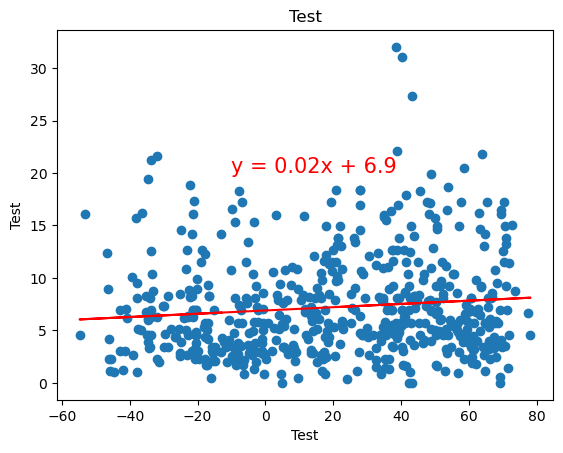

In [42]:
lin_reg_plot(city_data_df['Lat'], city_data_df['Wind Speed'],-10,20,"Test","Test","Test")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makakilo city,21.3469,-158.0858,82.72,64,20,13.80,US,1682548518
1,fortuna,40.5982,-124.1573,67.93,69,45,3.00,US,1682548519
3,katsuura,35.1333,140.3000,60.85,48,23,15.99,JP,1682548519
4,jamestown,42.0970,-79.2353,50.52,45,0,10.36,US,1682547998
6,taganak,6.0833,118.3000,78.94,75,100,3.22,PH,1682548520


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port lincoln,-34.7333,135.8667,62.78,81,3,19.42,AU,1682548519
5,marapanim,-0.7175,-47.6997,75.85,91,97,2.80,BR,1682548519
7,ushuaia,-54.8000,-68.3000,38.86,81,20,4.61,AR,1682548434
13,cidreira,-30.1811,-50.2056,66.51,90,31,7.36,BR,1682548522
14,souillac,-20.5167,57.5167,75.58,94,75,4.61,MU,1682548409


###  Temperature vs. Latitude Linear Regression Plot

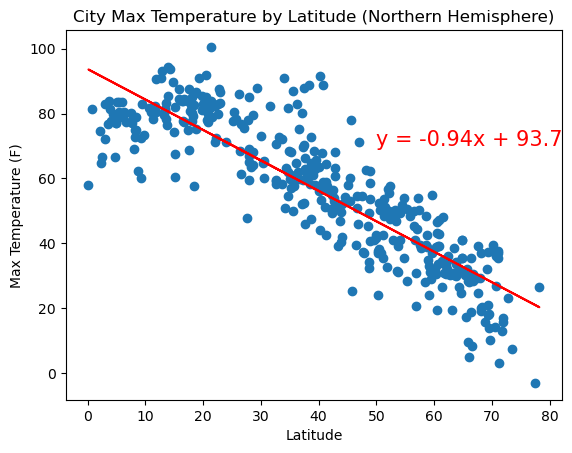

In [51]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],50,70,"City Max Temperature by Latitude (Northern Hemisphere)","Latitude","Max Temperature (F)")

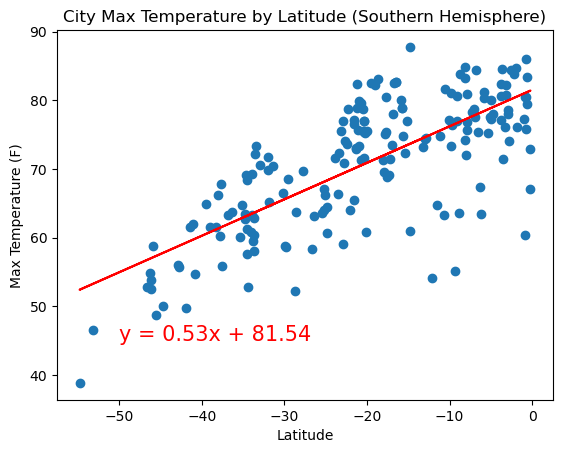

In [53]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],-50,45,"City Max Temperature by Latitude (Southern Hemisphere)","Latitude","Max Temperature (F)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


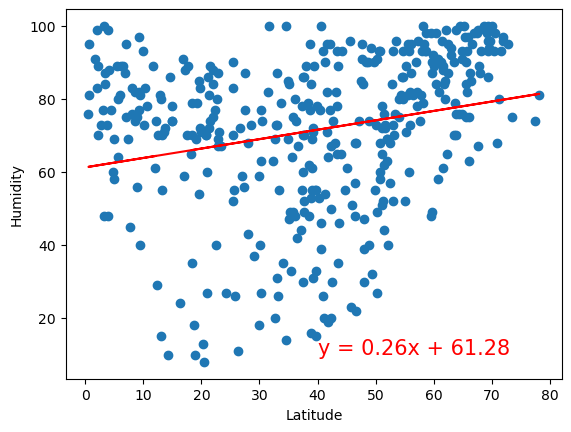

In [17]:
# Northern Hemisphere


The r-value is: 0.0002808747046324607


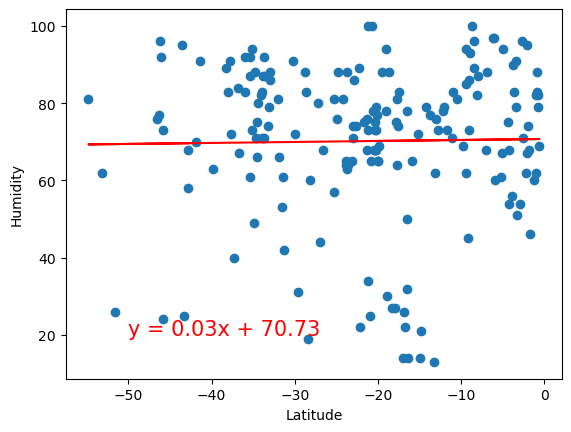

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


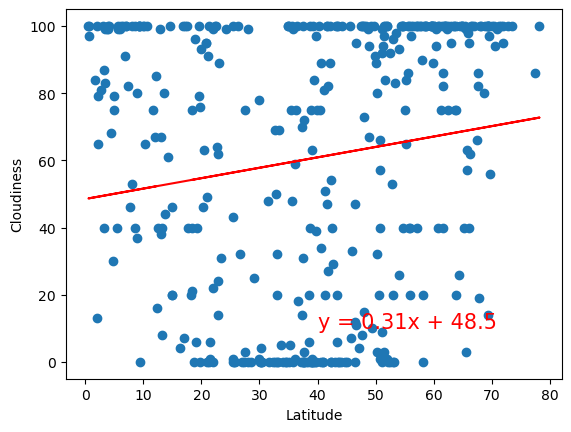

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


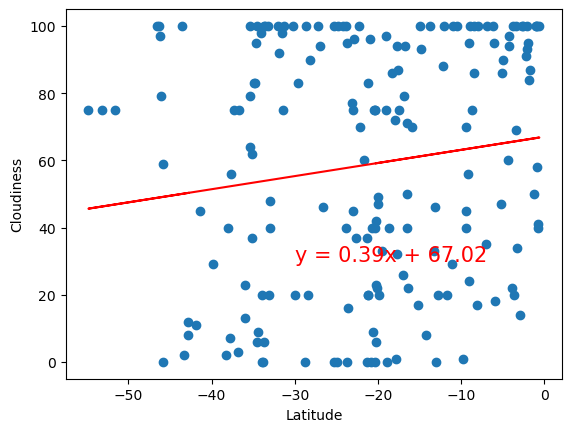

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


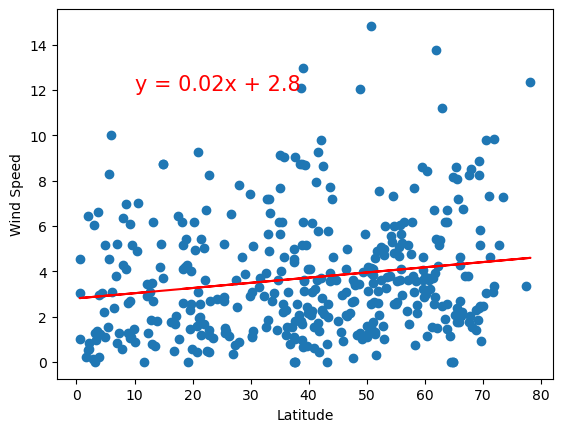

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


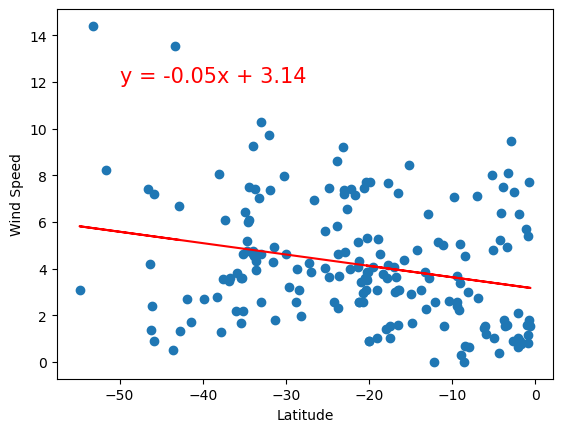

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE